In [136]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

harmonics = 5
a, b = 0, 2
f = lambda x: x * (2 - x) ** 2
y_k = lambda x, k: np.sin((np.pi * k / 2) * x)

c_k = (
    lambda k: spi.quad(lambda x: f(x) * y_k(x, k), 0, 2)[0]
    / spi.quad(lambda x: y_k(x, k) ** 2, 0, 2)[0]
)

fourier_series = lambda x, N: sum(c_k(k) * y_k(x, k) for k in range(1, N + 1))

In [137]:
x_vals = np.linspace(a, b, 100)
f_vals = f(x_vals)
fourier_vals = np.array([fourier_series(x, harmonics) for x in x_vals])

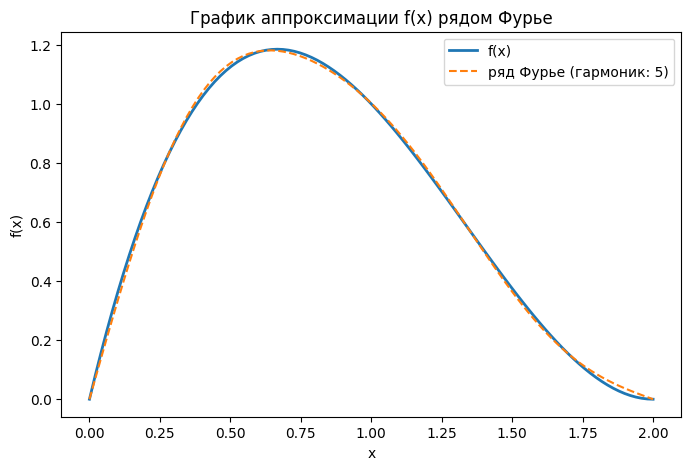

In [138]:
plt.figure(figsize=(8, 5))
plt.plot(x_vals, f_vals, label="f(x)", linewidth=2)
plt.plot(
    x_vals,
    fourier_vals,
    label=f"ряд Фурье (гармоник: {harmonics})",
    linestyle="--",
)
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("График аппроксимации f(x) рядом Фурье")
plt.show()

In [139]:
integral_f2 = spi.quad(lambda x: f(x) ** 2, 0, 2)[0]
sum_c2 = sum(c_k(k) ** 2 for k in range(1, harmonics + 1))

print(f"Integral of f^2(x): {integral_f2}")
print(f"Sum of squared Fourier coefficients: {sum_c2}")
print(f"Error: {abs(integral_f2 - sum_c2)}")

Integral of f^2(x): 1.2190476190476192
Sum of squared Fourier coefficients: 1.2187782094426083
Error: 0.00026940960501087297
